In [242]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
sys.path.append(_dir)


In [243]:
import numpy as np;

from util import excel_table;
from util.graph_fit import GraphFit;
from util.structs import DataCluster, Dataset, Measurement;

<hr />

#### 238.b

Auswertung: Zeichnen Sie das Zeigerdiagramm für diese Schaltung. Berechnen Sie 𝑃S und cos(𝜑) (𝜑 = Phasenwinkel);

Tragen Sie 𝑃W, 𝑃S und 𝑃S cos(𝜑) gegen 𝑅 (𝑅 = 𝑈𝑅/𝐼, 𝑃S = 𝑈𝐼, cos(𝜑) = 𝑈𝑅/𝑈) auf. Bestimmen Sie die maximale Leistung 𝑃W,max, welche die Schaltung der Spannungsquelle entnehmen kann, und den entsprechenden Widerstand. Markieren Sie diese Werte in dem entsprechenden Diagramm.

In [244]:
a_table = excel_table.read("../data/238a_2.xlsx", remove_header=True)
a_data = DataCluster();

# print(a_table);
cassy_err = 0.01; # multiplicative
volt_range_error = 0.005 * 100;

for row in a_table:
    a_data.add(Dataset({
        "I_1 [A]": Measurement(row[1], abs(cassy_err * row[1])),
        "U_1 [V]": Measurement(row[2], abs(cassy_err * row[2]) + volt_range_error),
        "U_R [V]": Measurement(row[5], abs(cassy_err * row[5]) + volt_range_error),
        "PW [W]": Measurement(row[7], abs(cassy_err * row[7])),
        # "cos_phi_mess": Measurement(row[3], abs(cassy_err * row[3])),
    }))
    
a_data.round_index("I_1 [A]", 2)
a_data.round_index("U_1 [V]", 1)
a_data.round_index("U_R [V]", 1)
a_data.round_index("PW [W]", 2)
# a_data.round_index("cos_phi_mess", 3)

a_df = a_data.get_markdownTable();
a_df.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
I_1 [A],0.73789,0.73742,0.73742,0.73765,0.73742,0.74094,0.75650,0.77972,0.79912,0.81206,...,1.0149,1.0160,1.0180,1.0173,1.0169,1.0177,1.0173,1.0173,1.0166,1.0167
ΔI_1 [A],0.00738,0.00738,0.00738,0.00738,0.00738,0.00741,0.00757,0.00780,0.00800,0.00813,...,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102
PW [W],22.66900,22.65700,22.65800,22.64800,22.65500,22.67300,22.55500,22.41100,22.19300,21.95500,...,5.4790,5.0286,4.9910,4.9628,4.9743,5.0120,5.0255,5.0310,5.0274,5.0078
ΔPW [W],0.22700,0.22700,0.22700,0.22700,0.22700,0.22700,0.22600,0.22500,0.22200,0.22000,...,0.0548,0.0503,0.0500,0.0497,0.0498,0.0502,0.0503,0.0504,0.0503,0.0501
U_1 [V],47.23000,47.23000,47.22000,47.21000,47.22000,47.22000,47.23000,47.23000,47.23000,47.22000,...,47.4400,47.4500,47.4500,47.4500,47.4500,47.4400,47.4300,47.4400,47.4400,47.4600
ΔU_1 [V],0.98000,0.98000,0.98000,0.98000,0.98000,0.98000,0.98000,0.98000,0.98000,0.98000,...,0.9800,0.9800,0.9800,0.9800,0.9800,0.9800,0.9800,0.9800,0.9800,0.9800
U_R [V],30.35000,30.34000,30.36000,30.37000,30.36000,30.09000,29.13000,27.97000,26.93000,26.16000,...,3.6400,3.2200,3.2100,3.2100,3.2300,3.2400,3.2600,3.2700,3.2700,3.2600
ΔU_R [V],0.81000,0.81000,0.81000,0.81000,0.81000,0.81000,0.80000,0.78000,0.77000,0.77000,...,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400,0.5400


In [245]:
for dataset in a_data:
    dataset["R [ohm]"] = dataset["U_R [V]"] / dataset["I_1 [A]"];
    dataset["PS [W]"] = dataset["U_1 [V]"] * dataset["I_1 [A]"];

a_data.round_index("R [ohm]", 2)
a_data.round_index("PS [W]", 2)

for dataset in a_data:
    dataset["cos_phi"] = dataset["U_R [V]"] / dataset["U_1 [V]"];

a_data.round_index("cos_phi", 2);

for dataset in a_data:
    dataset["PS_cos [W]"] = dataset["PS [W]"] * dataset["cos_phi"];

a_data.round_index("PS_cos [W]", 2)

a_data.save_to_excel("../output/238a")

a_df = a_data.get_markdownTable();
a_df.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
I_1 [A],0.73789,0.73742,0.73742,0.73765,0.73742,0.74094,0.75650,0.77972,0.79912,0.81206,...,1.0149,1.0160,1.0180,1.0173,1.0169,1.0177,1.0173,1.0173,1.0166,1.0167
ΔI_1 [A],0.00738,0.00738,0.00738,0.00738,0.00738,0.00741,0.00757,0.00780,0.00800,0.00813,...,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102
PS [W],34.85100,34.82800,34.82100,34.82400,34.82100,34.98700,35.72900,36.82600,37.74200,38.34500,...,48.1500,48.2100,48.3000,48.2700,48.2500,48.2800,48.2500,48.2600,48.2300,48.2500
ΔPS [W],0.80300,0.80300,0.80300,0.80300,0.80300,0.80700,0.82400,0.84900,0.87000,0.88400,...,1.1100,1.1100,1.1100,1.1100,1.1100,1.1100,1.1100,1.1100,1.1100,1.1100
PS_cos [W],22.39500,22.37400,22.38600,22.40200,22.38600,22.29400,22.03800,21.80800,21.52000,21.24300,...,3.6930,3.2730,3.2700,3.2680,3.2860,3.2980,3.3150,3.3250,3.3230,3.3150
ΔPS_cos [W],0.91900,0.91800,0.91900,0.91900,0.91900,0.91700,0.91600,0.91100,0.91000,0.91000,...,0.5610,0.5600,0.5610,0.5610,0.5610,0.5610,0.5610,0.5610,0.5600,0.5610
PW [W],22.66900,22.65700,22.65800,22.64800,22.65500,22.67300,22.55500,22.41100,22.19300,21.95500,...,5.4790,5.0286,4.9910,4.9628,4.9743,5.0120,5.0255,5.0310,5.0274,5.0078
ΔPW [W],0.22700,0.22700,0.22700,0.22700,0.22700,0.22700,0.22600,0.22500,0.22200,0.22000,...,0.0548,0.0503,0.0500,0.0497,0.0498,0.0502,0.0503,0.0504,0.0503,0.0501
R [ohm],41.13000,41.14000,41.17000,41.17000,41.17000,40.61000,38.51000,35.87000,33.70000,32.21000,...,3.5870,3.1690,3.1530,3.1550,3.1760,3.1840,3.2050,3.2140,3.2170,3.2060
ΔR [ohm],1.18000,1.18000,1.18000,1.18000,1.18000,1.17000,1.13000,1.07000,1.03000,1.01000,...,0.5340,0.5330,0.5320,0.5320,0.5320,0.5320,0.5320,0.5320,0.5330,0.5330


In [246]:
U = Measurement(47, 1)
C = Measurement(80, 0.8) * 1e-6
frequenz = Measurement(50.0, 0.5);
omega = 2 * np.pi * frequenz;
omega.round(0)

P_W_max = 1/2 * U**2 * omega * C;
R_max = 1 /(omega * C)
print(P_W_max)
print(R_max)

( 27.745 ±   1.263) [⋅]
(398.089 ±   6.447)e-1 [⋅]



Bad key scatter.edgecolor in file ../../../../util/pyplot/scatter_plot.mplstyle, line 25 ('scatter.edgecolor: black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key scatter.sizes in file ../../../../util/pyplot/scatter_plot.mplstyle, line 26 ('scatter.sizes: 50')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


27.745039999999996


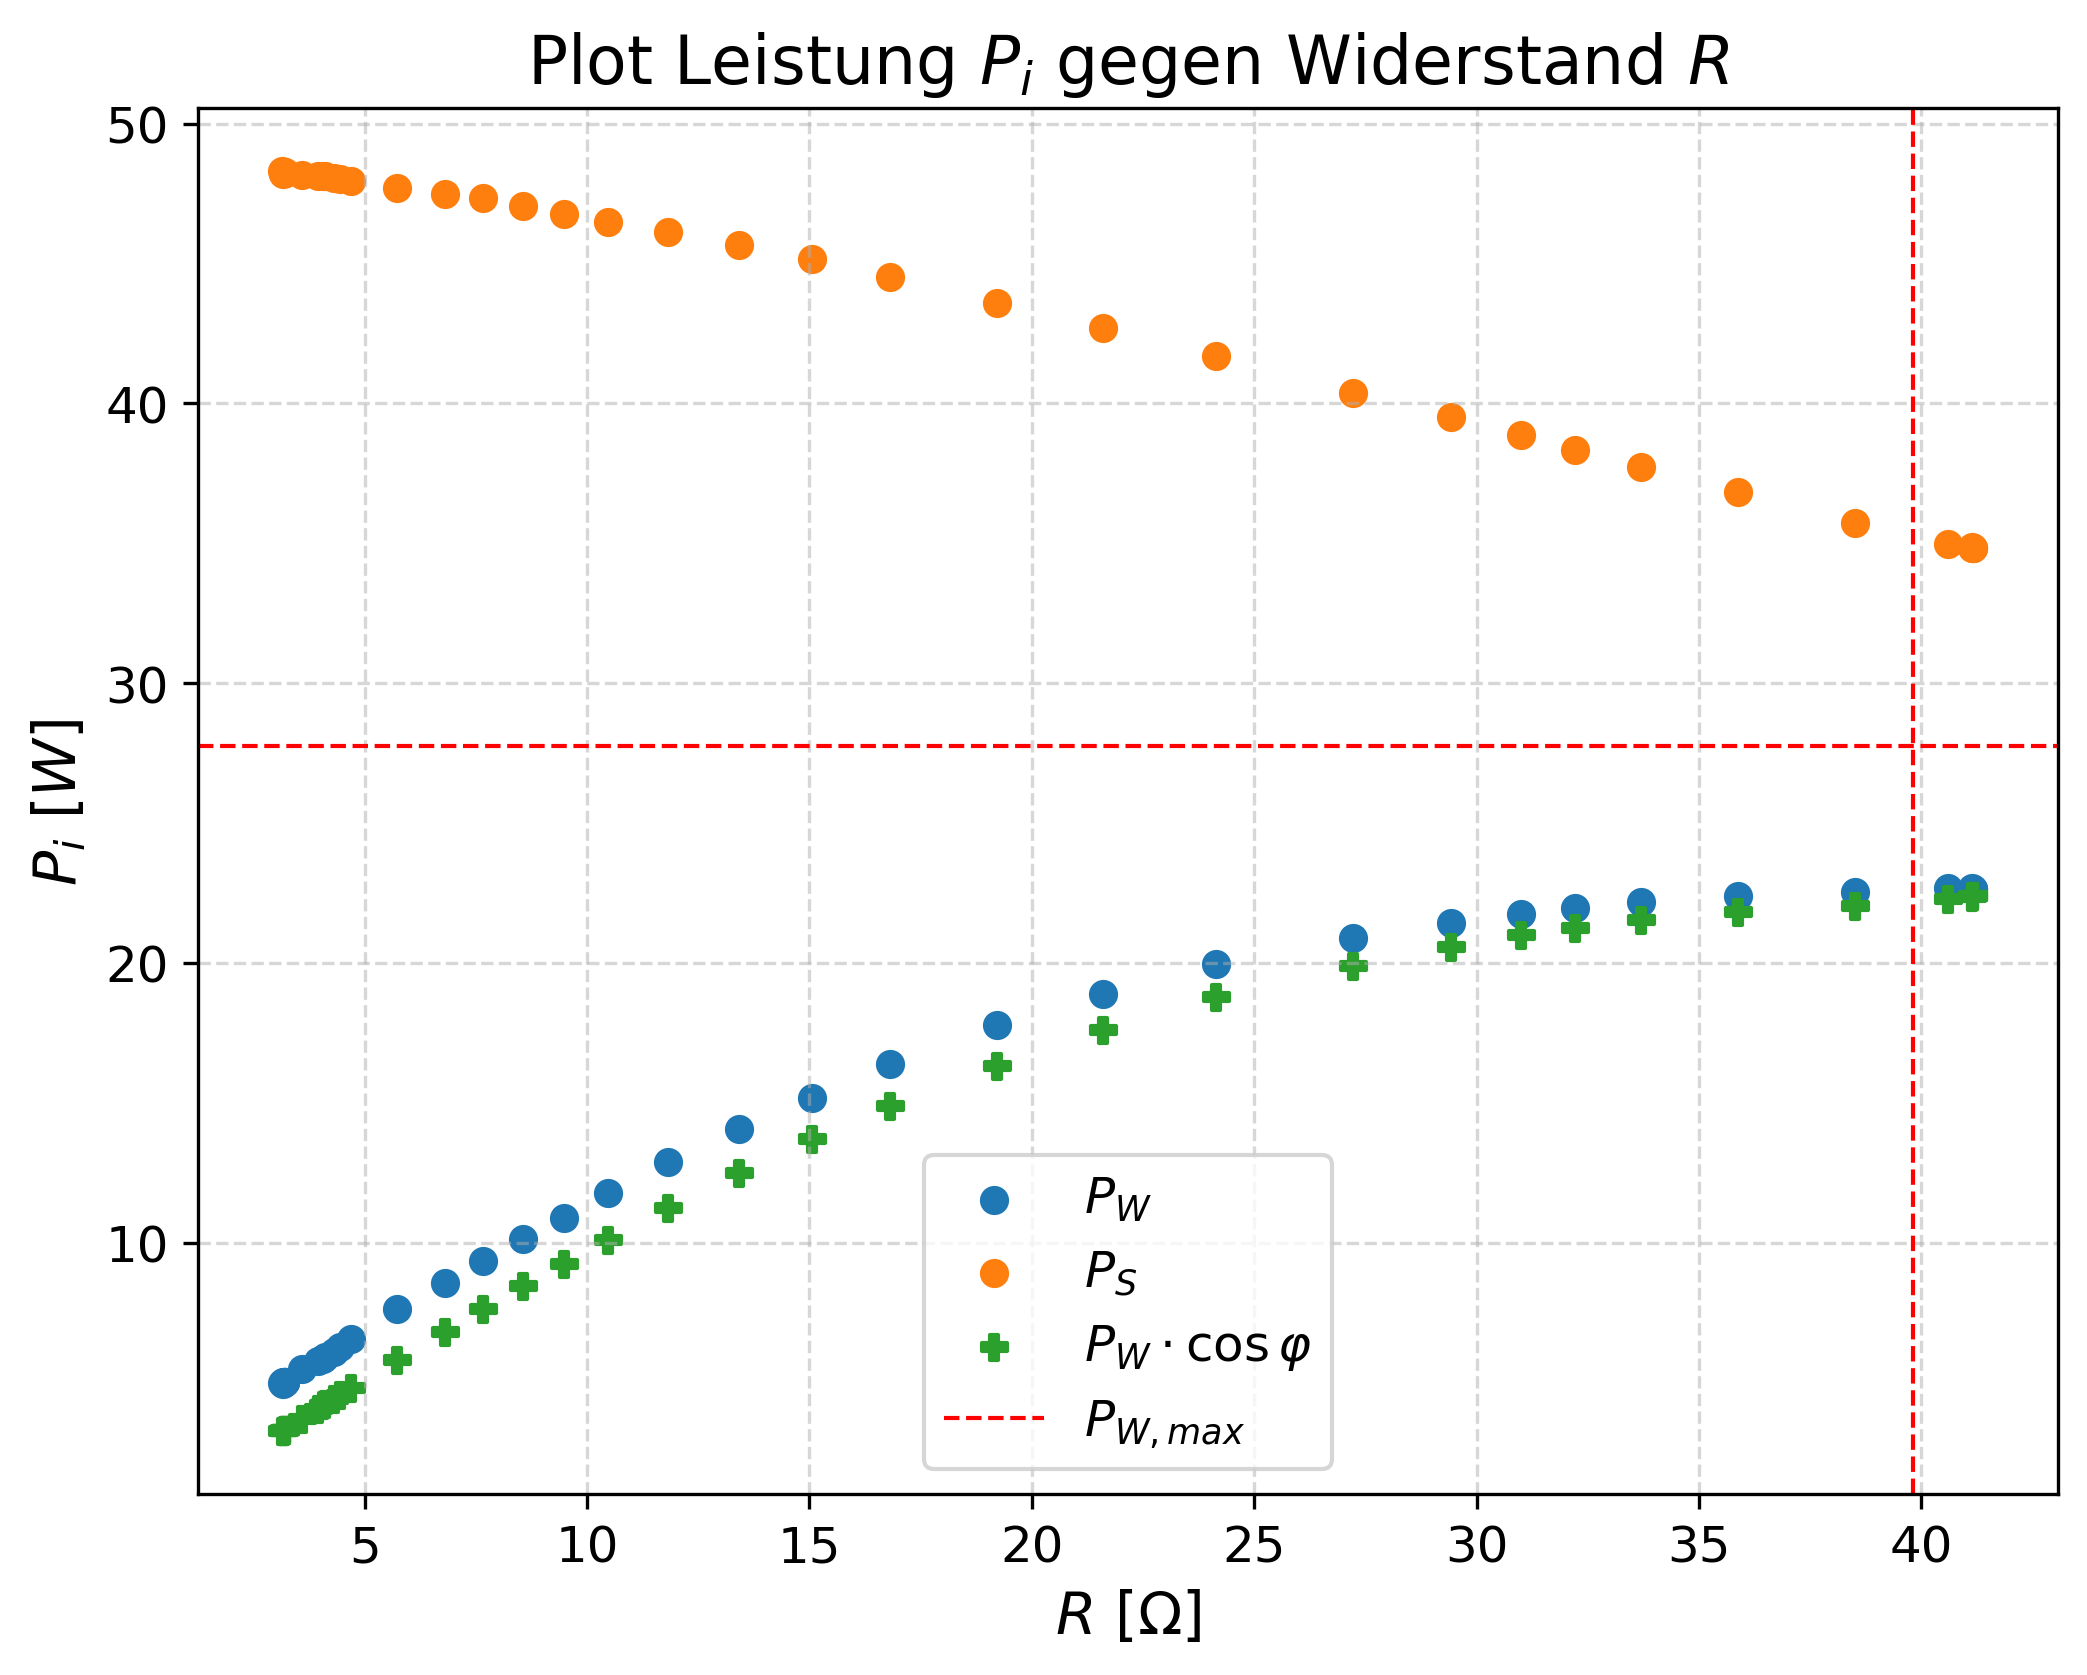

In [247]:
from util import graph
import matplotlib.pyplot as plt;

plot = plt.subplots();
fig, ax = plot;

plt.style.use("../../../../util/pyplot/scatter_plot.mplstyle");

graph.scatter_data(a_data, "R [ohm]", "PW [W]", with_error=False, p=plot, label=r"$P_W$");
graph.scatter_data(a_data, "R [ohm]", "PS [W]", with_error=False, p=plot, label=r"$P_S$");
graph.scatter_data(a_data, "R [ohm]", "PS_cos [W]", with_error=False, p=plot, label=r"$P_W \cdot \cos\varphi$", marker="P", linewidth = 1);
# graph.scatter_data(a_data, "R [ohm]", "PW [W]", p=plot, label=r"$P_W$");
# graph.scatter_data(a_data, "R [ohm]", "PS [W]", p=plot, label=r"$P_S$");
# graph.scatter_data(a_data, "R [ohm]", "PS_cos [W]", p=plot, label=r"$P_W \cdot \cos\varphi$", marker="P", linewidth = 1);

print(P_W_max.value)
ax.axhline(y=P_W_max.value, color="red", linewidth=1, linestyle="--", label=r"$P_{W,max}$")
ax.axvline(x=R_max.value, color="red", linewidth=1, linestyle="--")

ax.set_xlabel(r"$R~[\Omega]$")
ax.set_ylabel(r"$P_i~[W]$")
ax.set_title(r"Plot Leistung $P_i$ gegen Widerstand $R$")
ax.legend()
fig.savefig("../output/238b");
fig.savefig("../pdfs/238b.pdf");

#### 238.c

Legen Sie eine Tabelle für alle Messgrößen und für die durch Auswertung zu bestimmenden Größen

𝑃S,1 = 𝑈1 𝐼1 Scheinleistung (primär) 𝑃S,2 = 𝑈2 𝐼2 Scheinleistung (sekundär) 𝑃V = 𝑃W,1 − 𝑃W,2 Verlustleistung 𝑃Cu = 𝑅1 𝐼2 1 + 𝑅2 𝐼2 2 Kupferverluste 𝑃Fe = 𝑃V − 𝑃Cu Eisenverluste 𝜂 = 𝑃W,2/𝑃W,1 Wirkungsgrad
Für die folgende Auswertung beachten Sie: Die in der Auswertungsanleitung angegebenen quantitativen Beziehungen sind teilweise Näherungen. Füllen Sie die angefangene Tabelle vollständig aus (Berechnung von 𝑃S,2, etc.). Tragen Sie die beiden Wirkleistungen 𝑃W,1 und 𝑃W,2, die Verlustleistungen 𝑃Cu, 𝑃Fe sowie den Wirkungsgrad 𝜂 gegen 𝐼2 auf.


In [248]:
c_table = excel_table.read("../data/238c_2.xlsx", remove_header=True);
c_data = DataCluster()

# c_R = Measurement(0.42, 0.01);
c_R_V = Measurement(0.6, 0.01);
c_N = Measurement(250, 1);

for row in c_table:
    c_data.add(Dataset({
        "I_1 [A]": Measurement(row[1], abs(cassy_err * row[1])),
        "U_1 [V]": Measurement(row[2], abs(cassy_err * row[2]) + volt_range_error),
        "I_2 [A]": Measurement(row[4], abs(cassy_err * row[4])),
        "U_2 [V]": Measurement(row[5], abs(cassy_err * row[5]) + volt_range_error),
        "PW_1 [W]": Measurement(abs(row[7]), abs(cassy_err * row[7])),
        "PW_2 [W]": Measurement(abs(row[8]), abs(cassy_err * row[8])),
    }))

c_data = c_data.filter_null();

c_data.round_index("I_1 [A]", 2)
c_data.round_index("I_2 [A]", 2)
c_data.round_index("U_1 [V]", 1)
c_data.round_index("U_2 [V]", 1)
c_data.round_index("PW_1 [W]", 1)
c_data.round_index("PW_2 [W]", 1)

c_df = c_data.get_markdownTable();
c_df.T


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
I_1 [A],0.14000,1.2400,1.2400,1.2400,1.2400,1.2400,1.2400,1.2600,1.3200,1.3600,...,2.7900,2.9700,3.1900,3.4000,3.5900,3.7700,3.9200,4.0600,4.0700,4.5300
ΔI_1 [A],0.00141,0.0124,0.0124,0.0124,0.0124,0.0124,0.0124,0.0126,0.0133,0.0136,...,0.0279,0.0298,0.0319,0.0340,0.0359,0.0378,0.0392,0.0406,0.0408,0.0453
I_2 [A],-0.04000,1.1500,1.1500,1.1500,1.1400,1.1400,1.1500,1.1900,1.2500,1.2900,...,2.7600,2.9500,3.1700,3.3800,3.5700,3.7400,3.8900,3.9800,3.9800,4.4500
ΔI_2 [A],0.00040,0.0115,0.0115,0.0115,0.0114,0.0114,0.0115,0.0119,0.0125,0.0129,...,0.0276,0.0295,0.0317,0.0338,0.0357,0.0374,0.0390,0.0398,0.0398,0.0446
PW_1 [W],1.70000,50.5000,50.5000,50.5000,50.4000,50.4000,50.4000,51.5000,53.7000,55.2000,...,93.2000,95.2000,95.9000,94.8000,91.9000,87.6000,81.8000,75.6000,74.4000,24.0000
ΔPW_1 [W],0.01700,0.5100,0.5100,0.5100,0.5100,0.5100,0.5100,0.5200,0.5400,0.5600,...,0.9400,0.9600,0.9600,0.9500,0.9200,0.8800,0.8200,0.7600,0.7500,0.2400
PW_2 [W],0.00000,48.0000,48.0000,48.0000,47.9000,47.9000,48.0000,49.7000,51.6000,53.1000,...,85.2000,85.3000,83.9000,80.8000,76.3000,70.1000,62.6000,56.8000,56.6000,1.1000
ΔPW_2 [W],0.00000,0.4800,0.4800,0.4800,0.4800,0.4800,0.4800,0.5000,0.5200,0.5400,...,0.8600,0.8600,0.8400,0.8100,0.7700,0.7100,0.6300,0.5700,0.5700,0.0120
U_1 [V],47.30000,46.8000,46.8000,46.8000,46.8000,46.8000,46.8000,46.8000,46.8000,46.8000,...,46.3000,46.3000,46.3000,46.3000,46.3000,46.4000,46.4000,46.5000,46.5000,46.9000
ΔU_1 [V],0.98000,0.9700,0.9700,0.9700,0.9700,0.9700,0.9700,0.9700,0.9700,0.9700,...,0.9700,0.9700,0.9700,0.9700,0.9700,0.9700,0.9700,0.9700,0.9700,0.9700


In [249]:
for dataset in c_data:
    dataset["PS_1 [W]"] = dataset["U_1 [V]"] * dataset["I_1 [A]"];
    dataset["PS_2 [W]"] = dataset["U_2 [V]"] * dataset["I_2 [A]"];
    dataset["PV [W]"] = dataset["PW_1 [W]"] - dataset["PW_2 [W]"];
    dataset["PCu [W]"] = c_R_V * dataset["I_1 [A]"]**2 + c_R_V * dataset["I_2 [A]"]**2;
    dataset[r"\eta"] = dataset["PW_2 [W]"] / dataset["PW_1 [W]"]

c_data.round_index("PS_1 [W]", 1)
c_data.round_index("PS_2 [W]", 1)
c_data.round_index("PV [W]", 1)
c_data.round_index("PCu [W]", 1)
c_data.round_index(r"\eta", 2)

for dataset in c_data:
    dataset["PFe [W]"] = dataset["PV [W]"] - dataset["PCu [W]"];

c_data.round_index("PFe [W]", 1);

c_data.save_to_excel("../output/238c")
c_df = c_data.get_markdownTable();
c_df.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
I_1 [A],0.14000,1.2400,1.2400,1.2400,1.2400,1.2400,1.2400,1.2600,1.3200,1.3600,...,2.7900,2.9700,3.1900,3.4000,3.5900,3.7700,3.9200,4.0600,4.0700,4.530000
ΔI_1 [A],0.00141,0.0124,0.0124,0.0124,0.0124,0.0124,0.0124,0.0126,0.0133,0.0136,...,0.0279,0.0298,0.0319,0.0340,0.0359,0.0378,0.0392,0.0406,0.0408,0.045300
I_2 [A],-0.04000,1.1500,1.1500,1.1500,1.1400,1.1400,1.1500,1.1900,1.2500,1.2900,...,2.7600,2.9500,3.1700,3.3800,3.5700,3.7400,3.8900,3.9800,3.9800,4.450000
ΔI_2 [A],0.00040,0.0115,0.0115,0.0115,0.0114,0.0114,0.0115,0.0119,0.0125,0.0129,...,0.0276,0.0295,0.0317,0.0338,0.0357,0.0374,0.0390,0.0398,0.0398,0.044600
PCu [W],0.01272,1.7160,1.7160,1.7160,1.7020,1.7020,1.7160,1.8020,1.9830,2.1080,...,9.2400,10.5100,12.1300,13.7900,15.3800,16.9200,18.3000,19.3900,19.4400,24.190000
ΔPCu [W],0.00031,0.0320,0.0320,0.0320,0.0320,0.0320,0.0320,0.0340,0.0370,0.0390,...,0.1800,0.2000,0.2300,0.2600,0.2900,0.3200,0.3400,0.3600,0.3600,0.450000
PFe [W],1.68700,0.7800,0.7800,0.7800,0.8000,0.8000,0.6800,-0.0000,0.1200,-0.0100,...,-1.2000,-0.6000,-0.1000,0.2000,0.2000,0.6000,0.9000,-0.6000,-1.6000,-1.290000
ΔPFe [W],0.01800,0.7200,0.7200,0.7200,0.7200,0.7200,0.7200,0.7400,0.7600,0.7900,...,1.4000,1.4000,1.4000,1.4000,1.3000,1.3000,1.2000,1.1000,1.1000,0.520000
PS_1 [W],6.62000,58.0000,58.0000,58.0000,58.0000,58.0000,58.0000,59.0000,61.8000,63.6000,...,129.2000,137.5000,147.7000,157.4000,166.2000,174.9000,181.9000,188.8000,189.3000,212.500000
ΔPS_1 [W],0.16000,1.4000,1.4000,1.4000,1.4000,1.4000,1.4000,1.4000,1.5000,1.5000,...,3.0000,3.2000,3.5000,3.7000,3.9000,4.1000,4.3000,4.4000,4.4000,4.900000


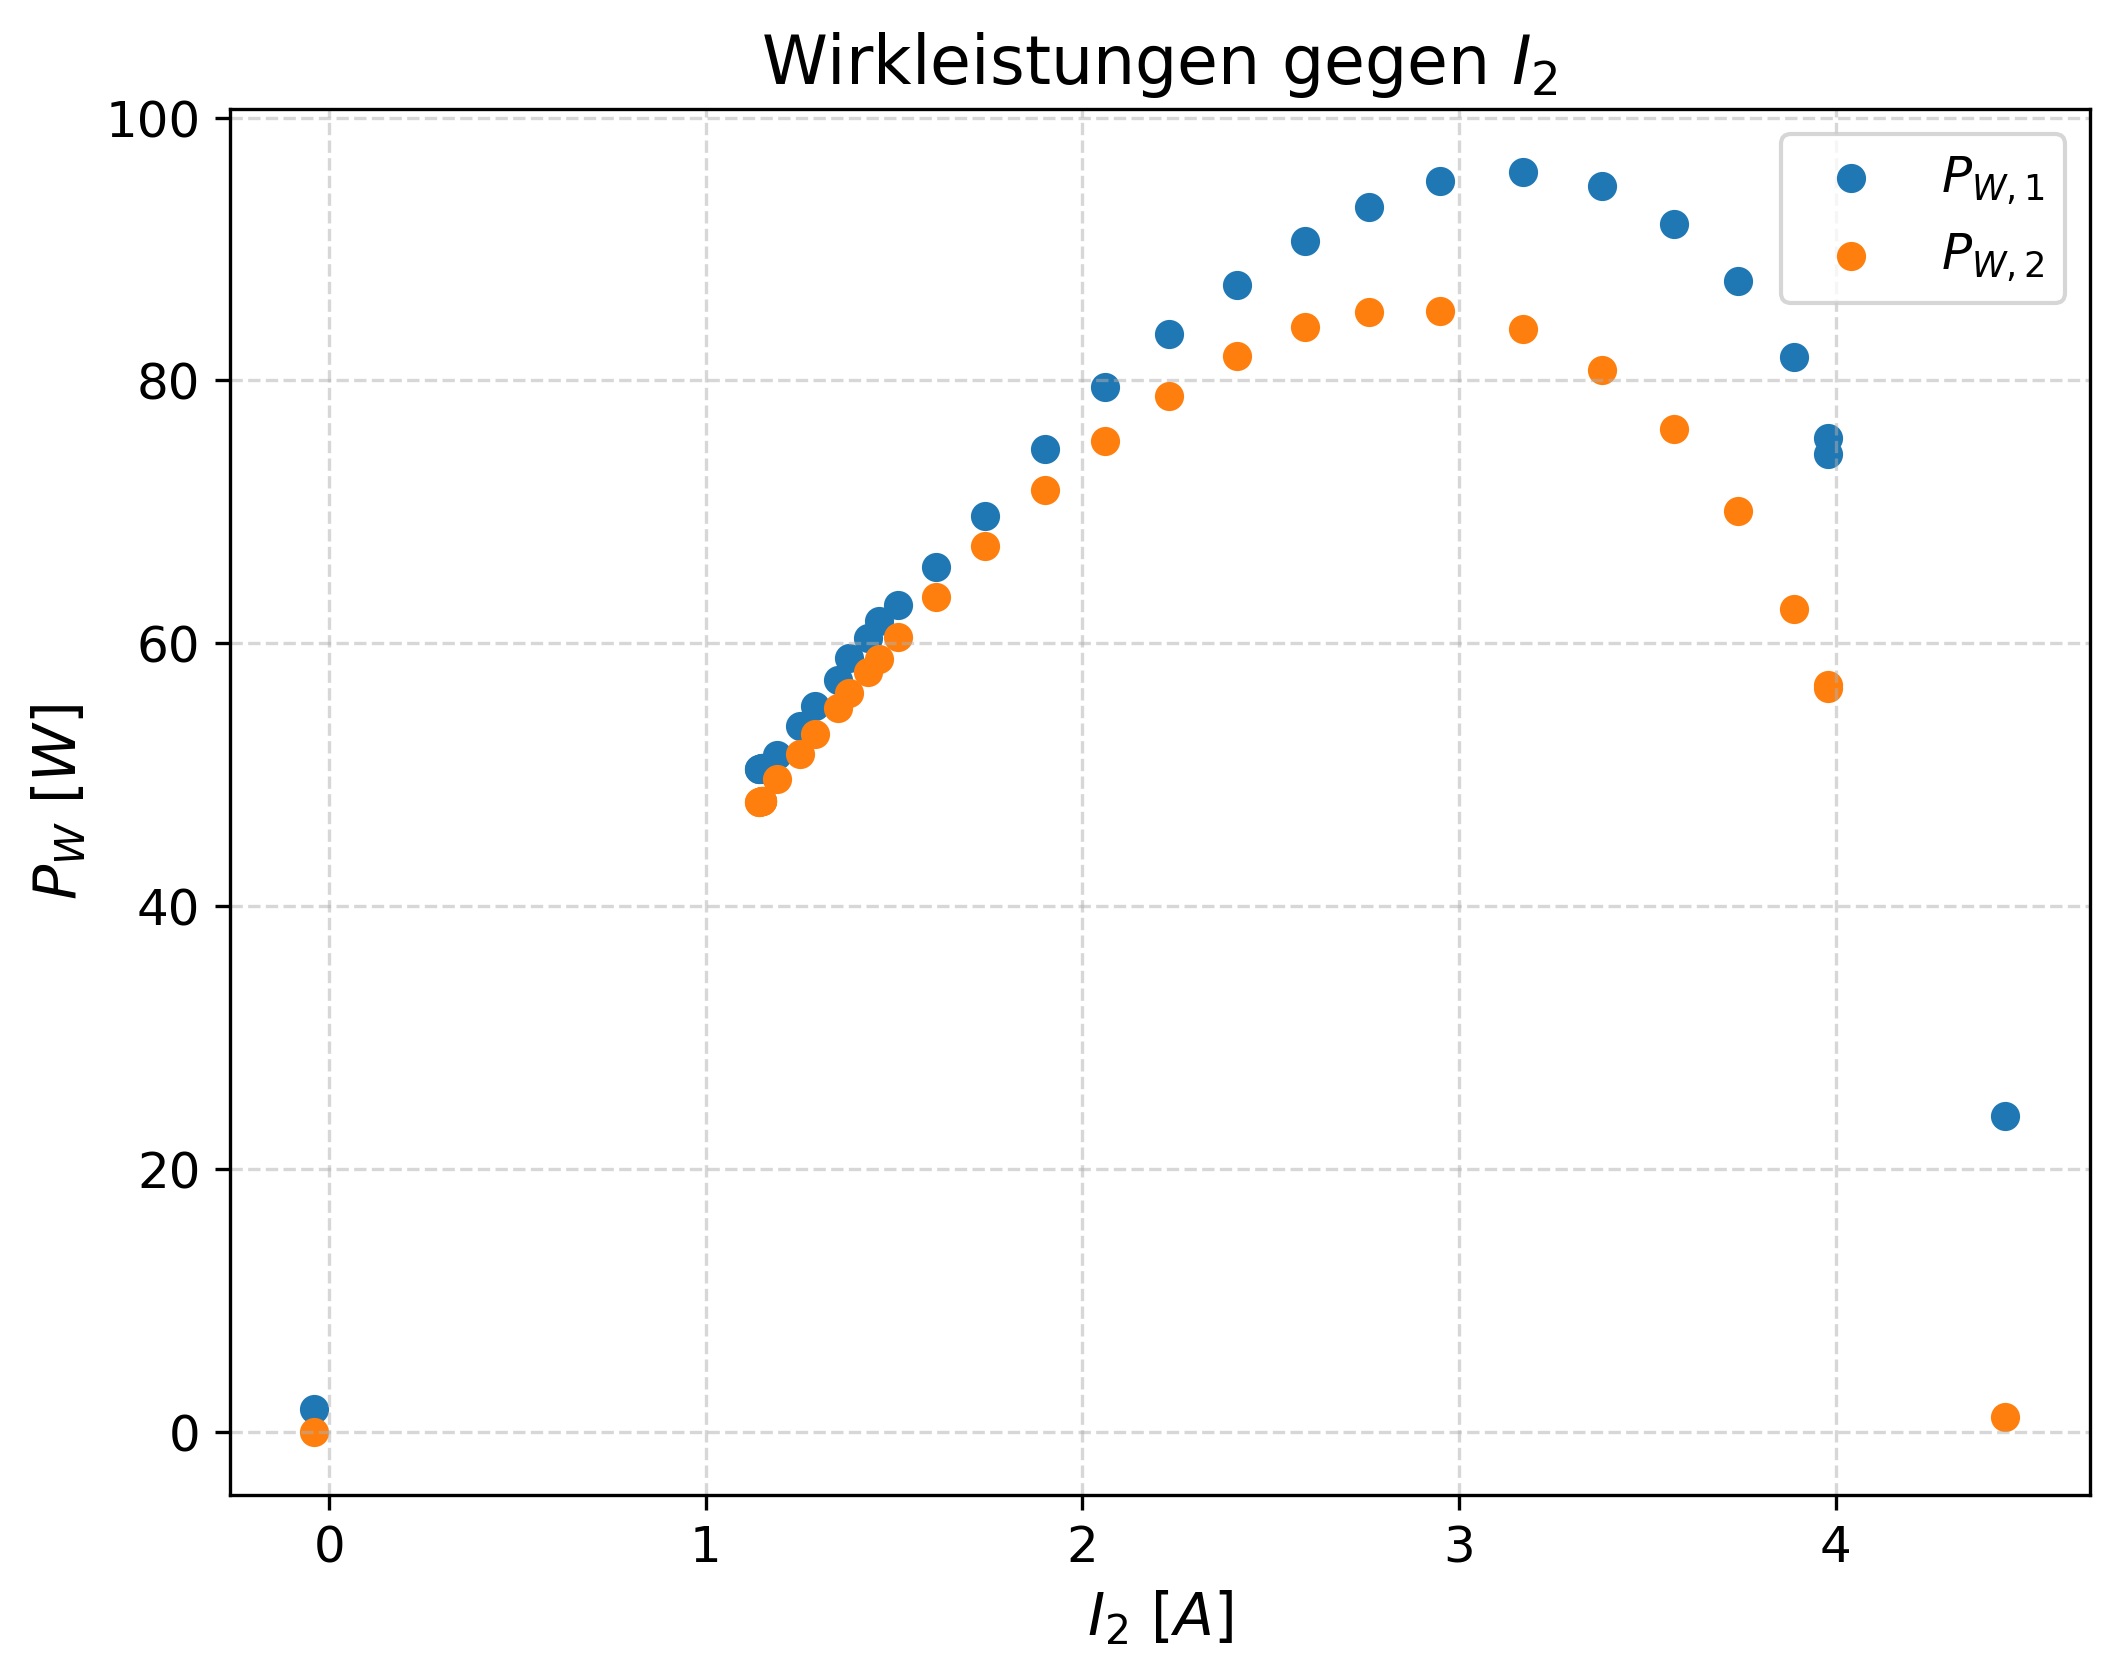

In [250]:
c_plot = plt.subplots();
fig, ax = c_plot;

graph.scatter_data(c_data, "I_2 [A]", "PW_1 [W]", with_error=False, p=c_plot, label=r"$P_{W,1}$")
graph.scatter_data(c_data, "I_2 [A]", "PW_2 [W]", with_error=False, p=c_plot, label=r"$P_{W,2}$")

ax.set_xlabel(r"$I_2~[A]$")
ax.set_ylabel(r"$P_W~[W]$")
ax.set_title(r"Wirkleistungen gegen $I_2$")
ax.legend();
fig.savefig("../output/238c_P");
fig.savefig("../pdfs/238c_P.pdf");

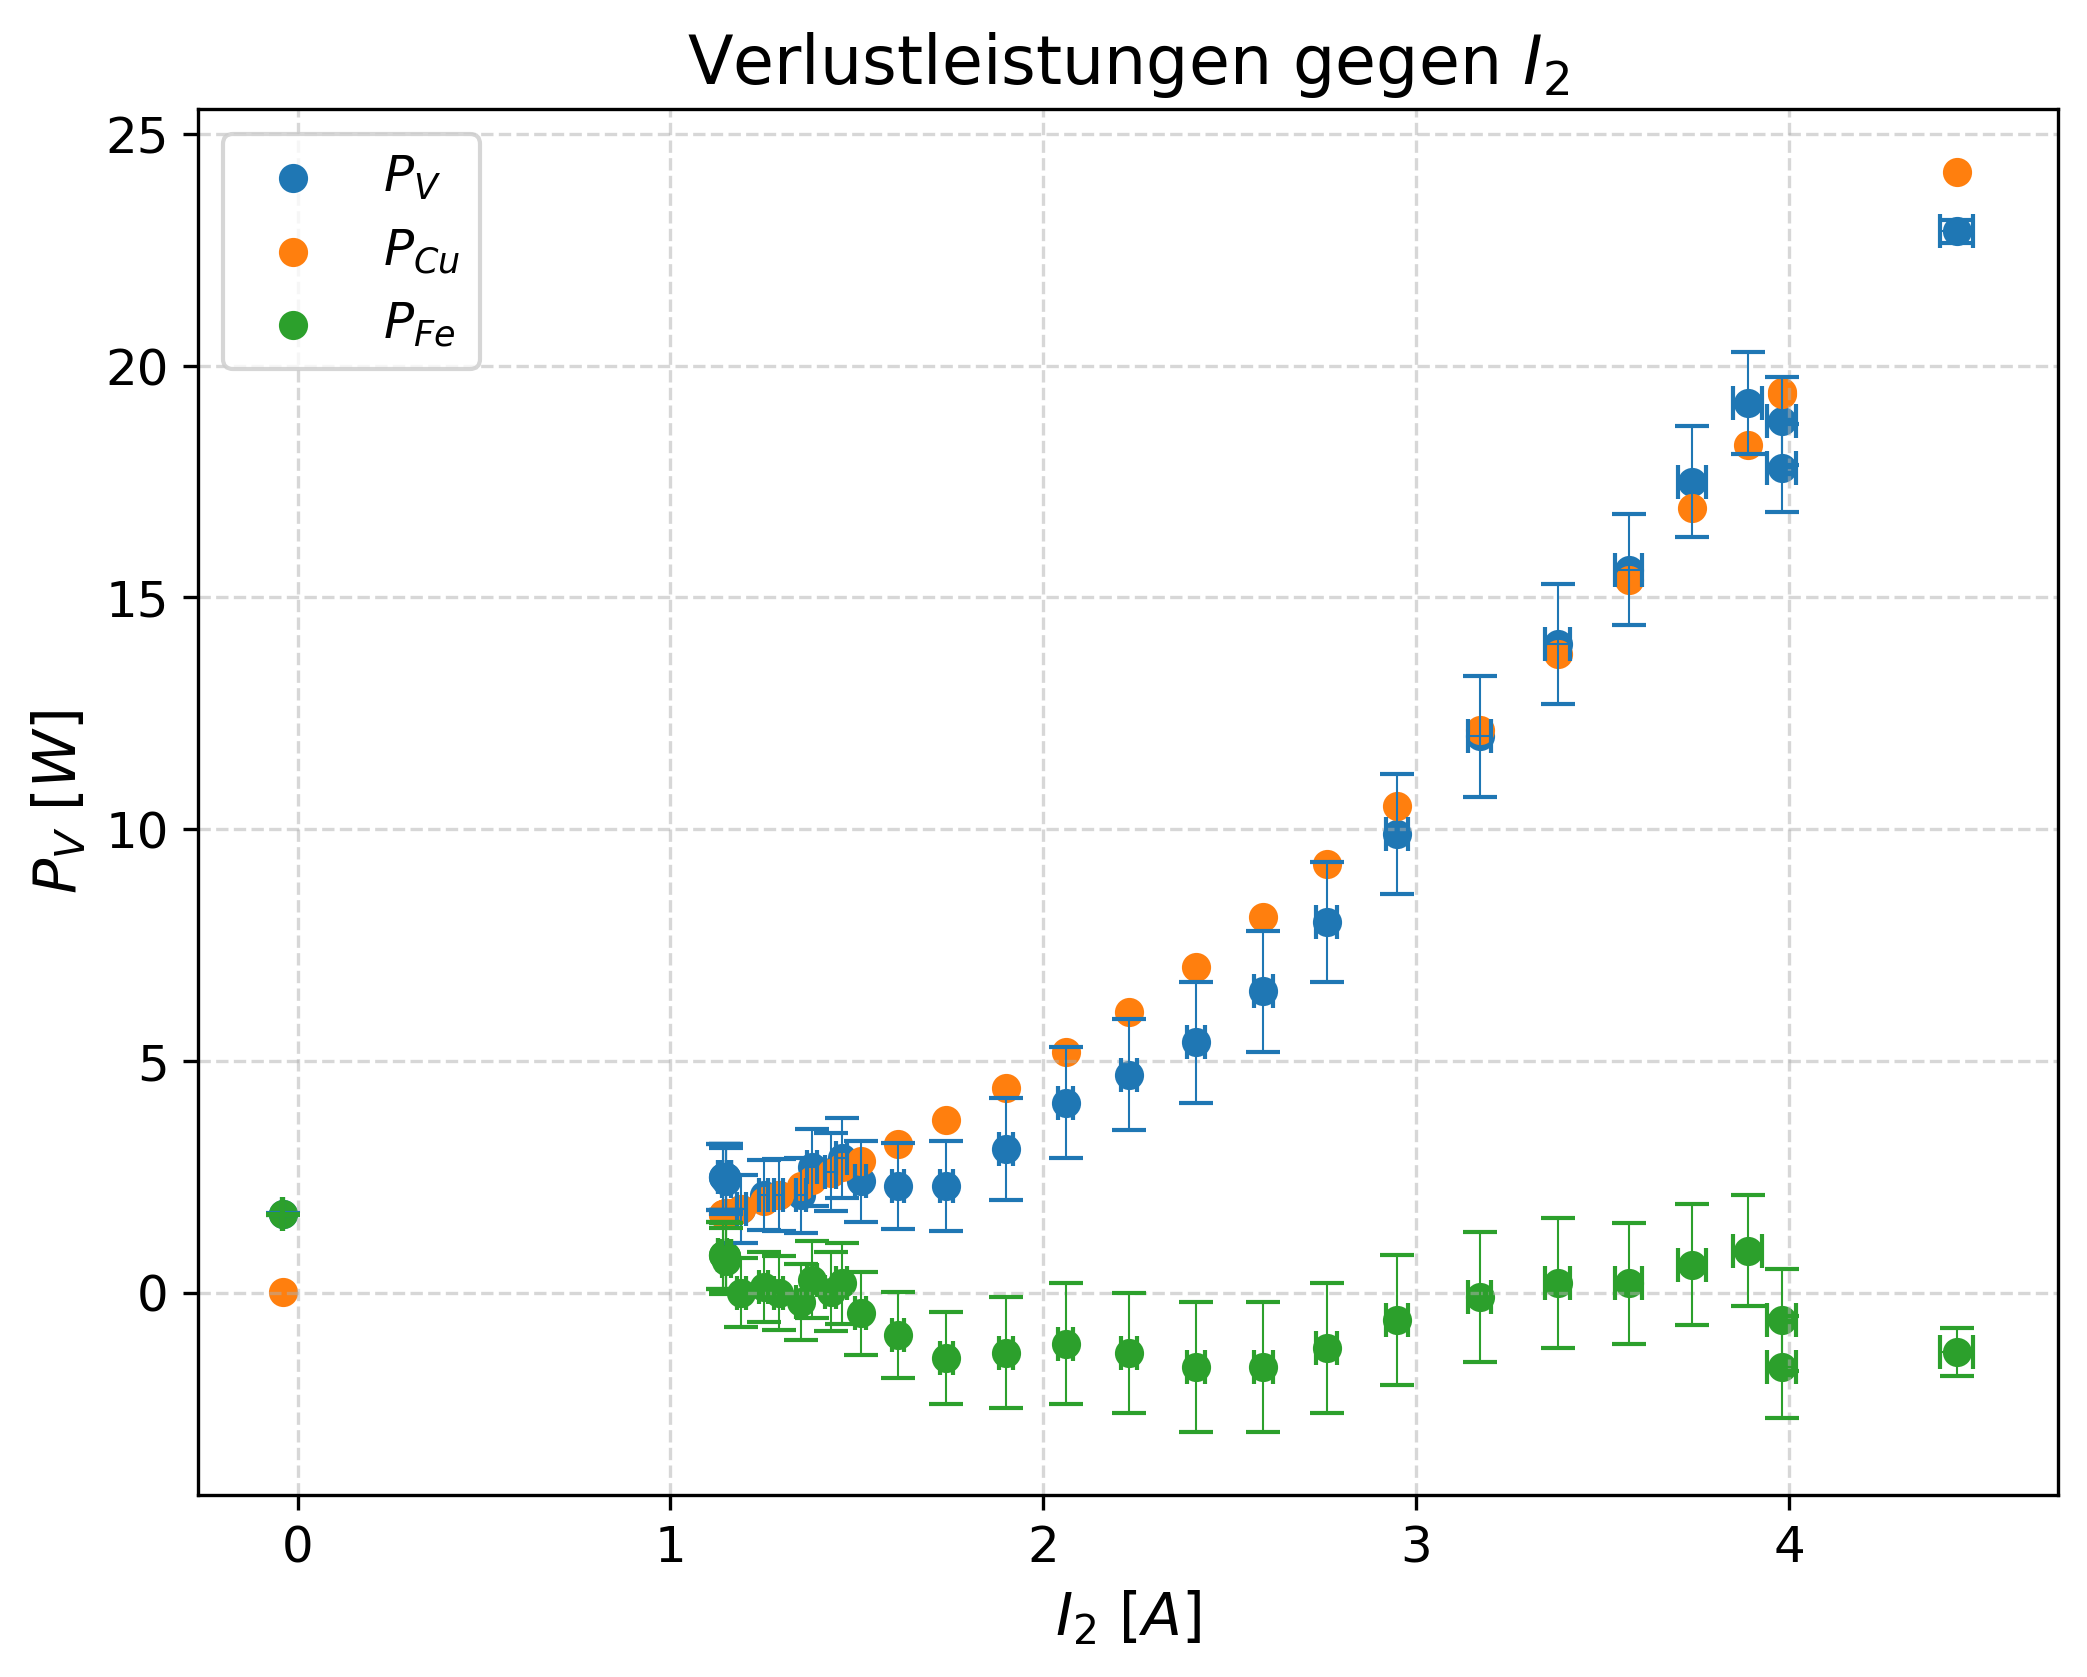

In [251]:
plot = plt.subplots();
fig, ax = plot;

# graph.scatter_data(c_data, "I_2 [A]", "PV [W]", with_error=False, p=plot, label=r"$P_{V}$")
graph.scatter_data(c_data, "I_2 [A]", "PV [W]", p=plot, label=r"$P_{V}$")
graph.scatter_data(c_data, "I_2 [A]", "PCu [W]", with_error=False, p=plot, label=r"$P_{Cu}$")
# graph.scatter_data(c_data, "I_2 [A]", "PCu [W]", p=plot, label=r"$P_{Cu}$")
# graph.scatter_data(c_data, "I_2 [A]", "PFe [W]", with_error=False, p=plot, label=r"$P_{Fe}$")
graph.scatter_data(c_data, "I_2 [A]", "PFe [W]", p=plot, label=r"$P_{Fe}$")

ax.set_xlabel(r"$I_2~[A]$")
ax.set_ylabel(r"$P_V~[W]$")
ax.set_title(r"Verlustleistungen gegen $I_2$")
ax.legend();

fig.savefig("../output/238c_PV");
fig.savefig("../pdfs/238c_PV.pdf");

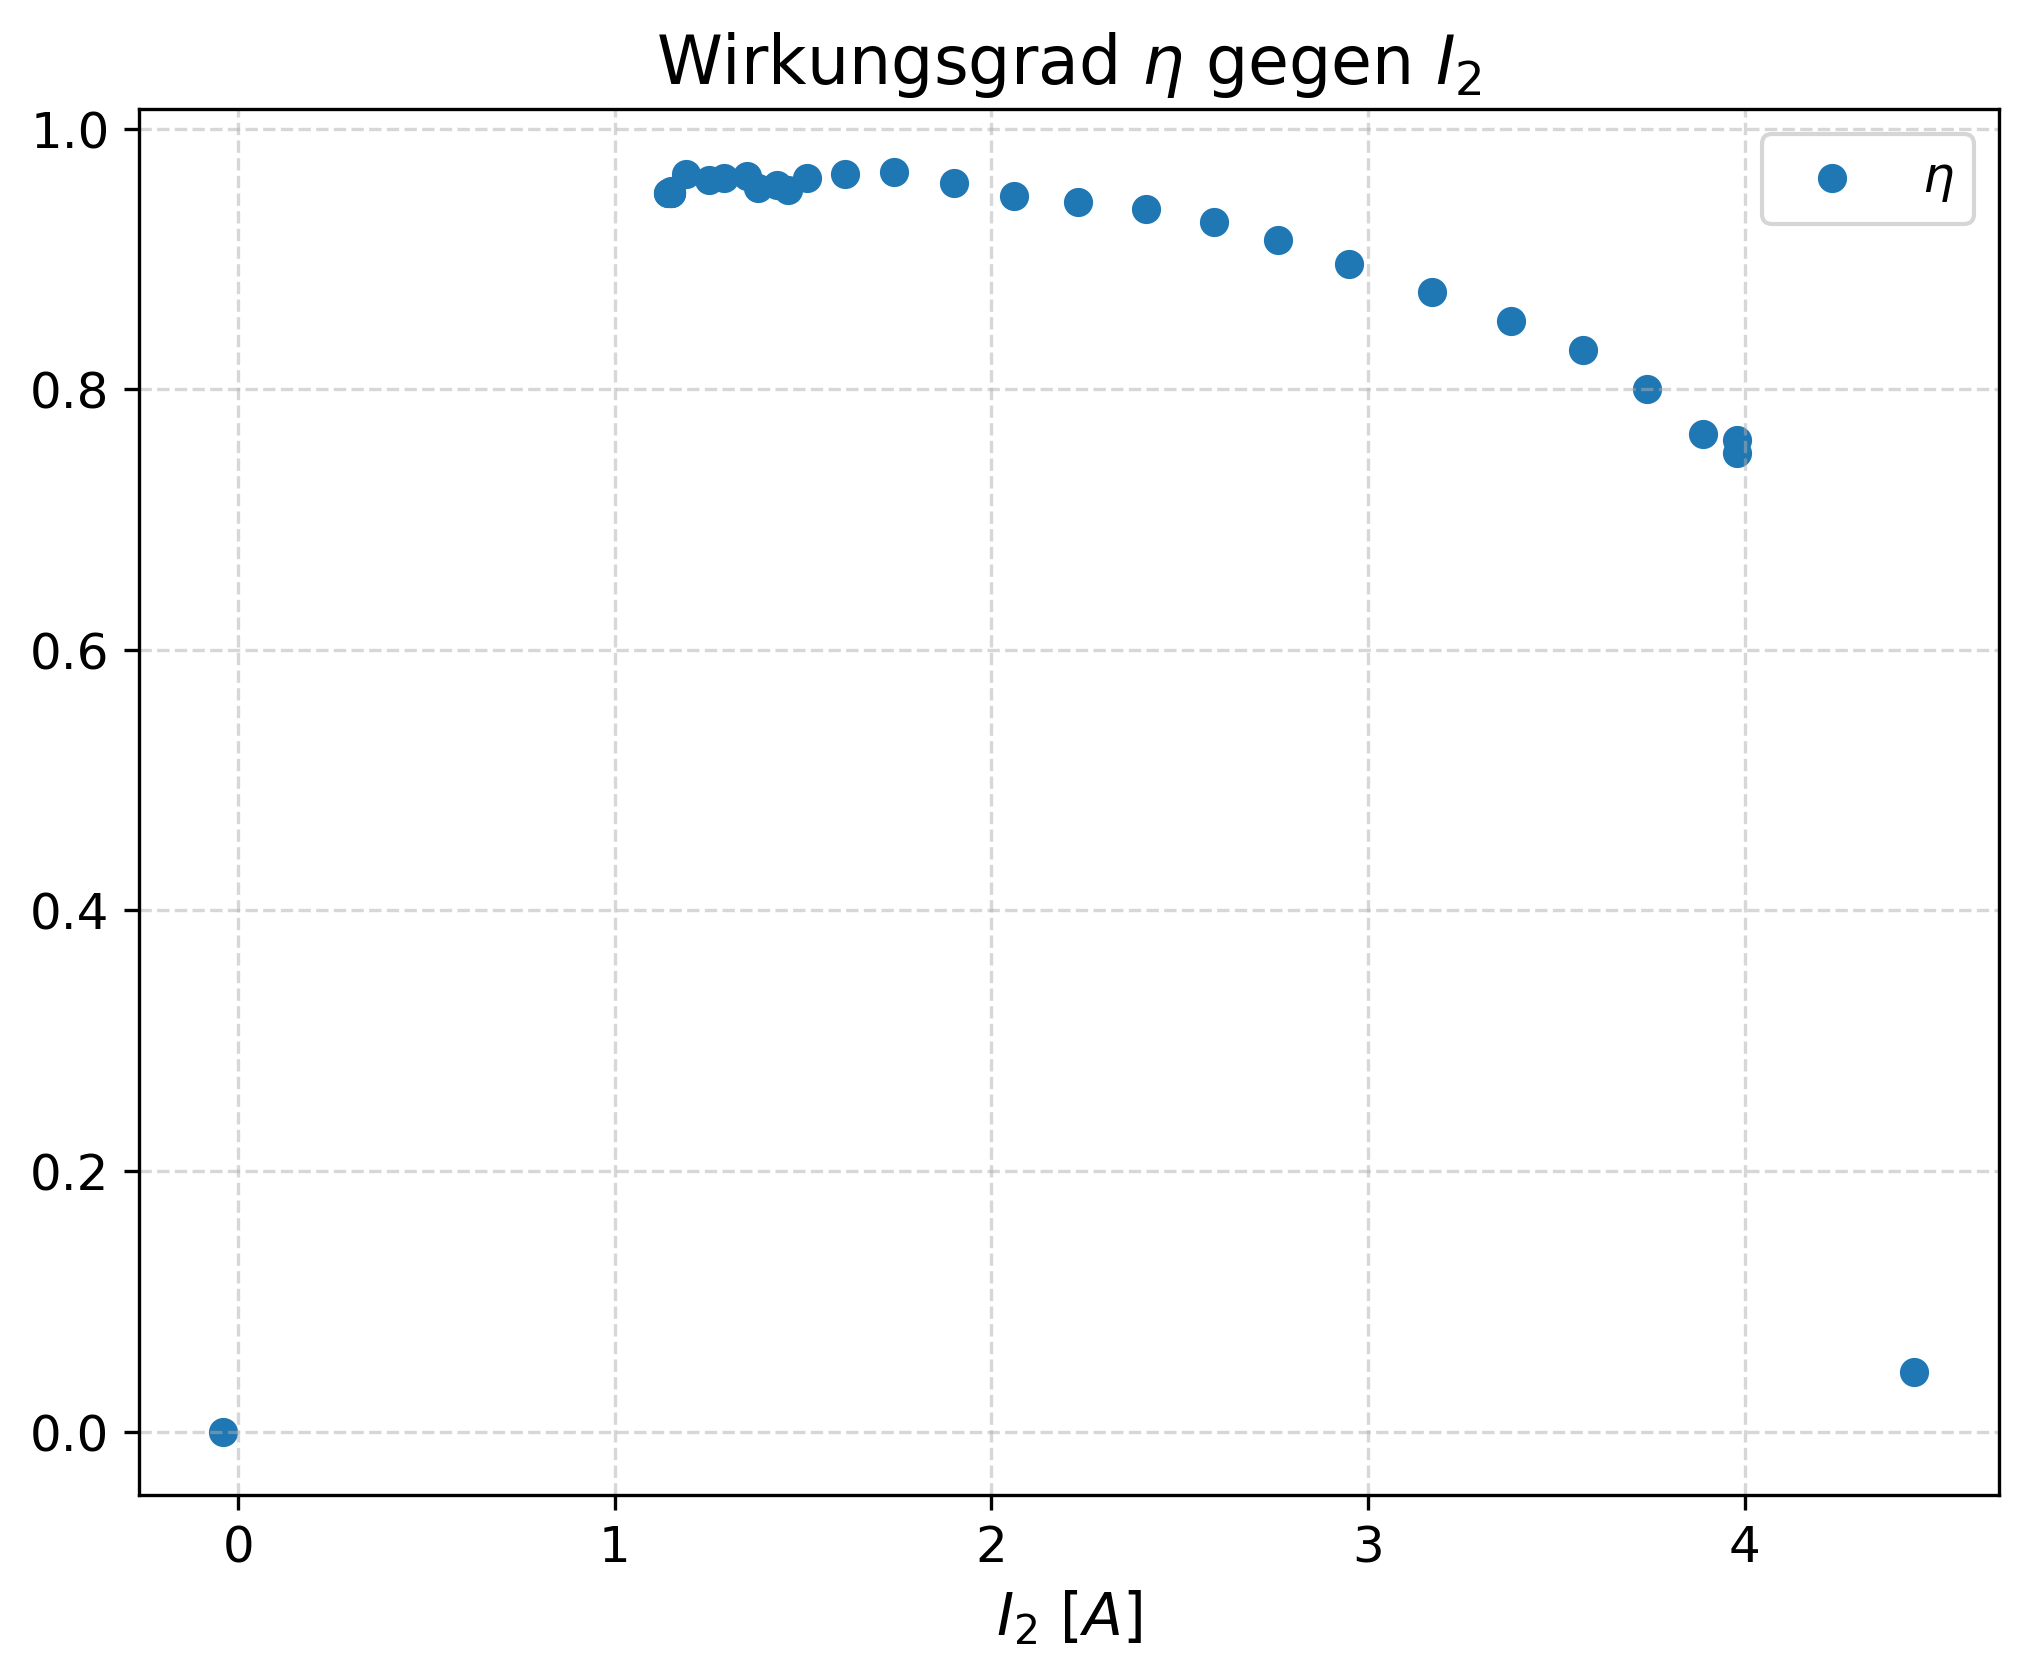

In [252]:
plot = plt.subplots();
fig, ax = plot;

graph.scatter_data(c_data, "I_2 [A]", r"\eta", with_error=False, p=plot, label=r"$\eta$")

ax.set_xlabel(r"$I_2~[A]$")
ax.set_title(r"Wirkungsgrad $\eta$ gegen $I_2$")
ax.legend()
fig.savefig("../output/238c_eta");
fig.savefig("../pdfs/238c_eta.pdf");

#### 238.d

In [253]:
U_leer = Measurement(47.3, 1);
I_Leer = Measurement(0.14, 0.01);

omegaL_1 = U_leer / I_Leer 

In [254]:
# R = Measurement();

# omegaL_2 = R;

In [255]:
# R_V = Measurement();
# R = Measurement();

# omegaL_3 = R + R_V

In [256]:
# omega_L = 1/3 (omegaL_1 + omegaL_2 + omegaL_3)
omega_L = omegaL_1

#### 238.e

In [257]:
U_1_kurz = Measurement(46.9, 1)
I_1_kurz = Measurement(4.53, 0.05)
I_2_kurz = Measurement(4.45, 0.05)

sigma_1 =  1 + (-(I_2_kurz / I_1_kurz)**2)
print(sigma_1)

(  3.501 ±   3.040)e-2 [⋅]


In [258]:
U_2_leer = Measurement(46.2, 1)
U_1_leer = Measurement(47.3, 1)

sigma_2 = 1 + (-(U_2_leer / U_1_leer)**2)
print(sigma_2)

(  4.597 ±   5.773)e-2 [⋅]


In [259]:
I_1_leer = Measurement(0.14, 0.01)

sigma_3 = U_1_kurz / I_1_kurz * I_1_leer / U_1_kurz
print(sigma_3)

( 30.905 ±   2.420)e-3 [⋅]


In [260]:
sigma = 1/3 * (sigma_1 + sigma_2 + sigma_3);
print(sigma)

(  3.729 ±   2.176)e-2 [⋅]


#### 238.f

In [261]:
M_L = (1 + -sigma)**0.5
print(M_L)
print(omega_L)

( 98.118 ±   1.109)e-2 [⋅]
( 33.786 ±   2.517)e+1 [⋅]


In [262]:
for dataset in c_data:
    dataset["U_21"] = dataset["U_2 [V]"] / dataset["U_1 [V]"];
    dataset["R"] = dataset["U_2 [V]"] / dataset["I_2 [A]"];

c_data.round_index("U_21", 1)
c_data.round_index("R", 1)


In [263]:
def calc_U21(R):
    nenner = R + 2 * c_R_V;
    first = R / nenner;

    second = M_L
    
    c = (sigma * omega_L) / nenner 
    d = 1 + c**2
    third = d**-.5

    return first * second * third;

In [264]:
for dataset in c_data:
    dataset["calc_U21"] = calc_U21(dataset["R"]);

c_data.round_index("I_1 [A]")
c_data.round_index("I_2 [A]")
c_data.round_index("U_1 [A]")
c_data.round_index("U_2 [A]")
c_data.round_index("calc_U21", 1)
c_data.save_to_excel("../output/238f")

print(c_data)

I_1 [A] | ΔI_1 [A] | I_2 [A] | ΔI_2 [A] | PCu [W] | ΔPCu [W] | PFe [W] | ΔPFe [W] | PS_1 [W] | ΔPS_1 [W] | PS_2 [W] | ΔPS_2 [W] | PV [W] | ΔPV [W] | PW_1 [W] | ΔPW_1 [W] | PW_2 [W] | ΔPW_2 [W] | R       | ΔR   | U_1 [V] | ΔU_1 [V] | U_2 [V] | ΔU_2 [V] | U_21  | ΔU_21 | \eta     | Δ\eta    | calc_U21 | Δcalc_U21
--------+----------+---------+----------+---------+----------+---------+----------+----------+-----------+----------+-----------+--------+---------+----------+-----------+----------+-----------+---------+------+---------+----------+---------+----------+-------+-------+----------+----------+----------+----------
0.14    | 0.002    | -0.04   | 0.0004   | 0.01272 | 0.00031  | 1.687   | 0.018    | 6.62     | 0.16      | -1.848   | 0.043     | 1.7    | 0.017   | 1.7      | 0.017     | 0.0      | 0.0       | -1155.0 | 27.0 | 47.3    | 0.98     | 46.2    | 0.97     | 0.977 | 0.029 | 0.0      | 0.0      | 0.982    | 0.035    
1.24    | 0.02     | 1.15    | 0.02     | 1.716   | 0.032    

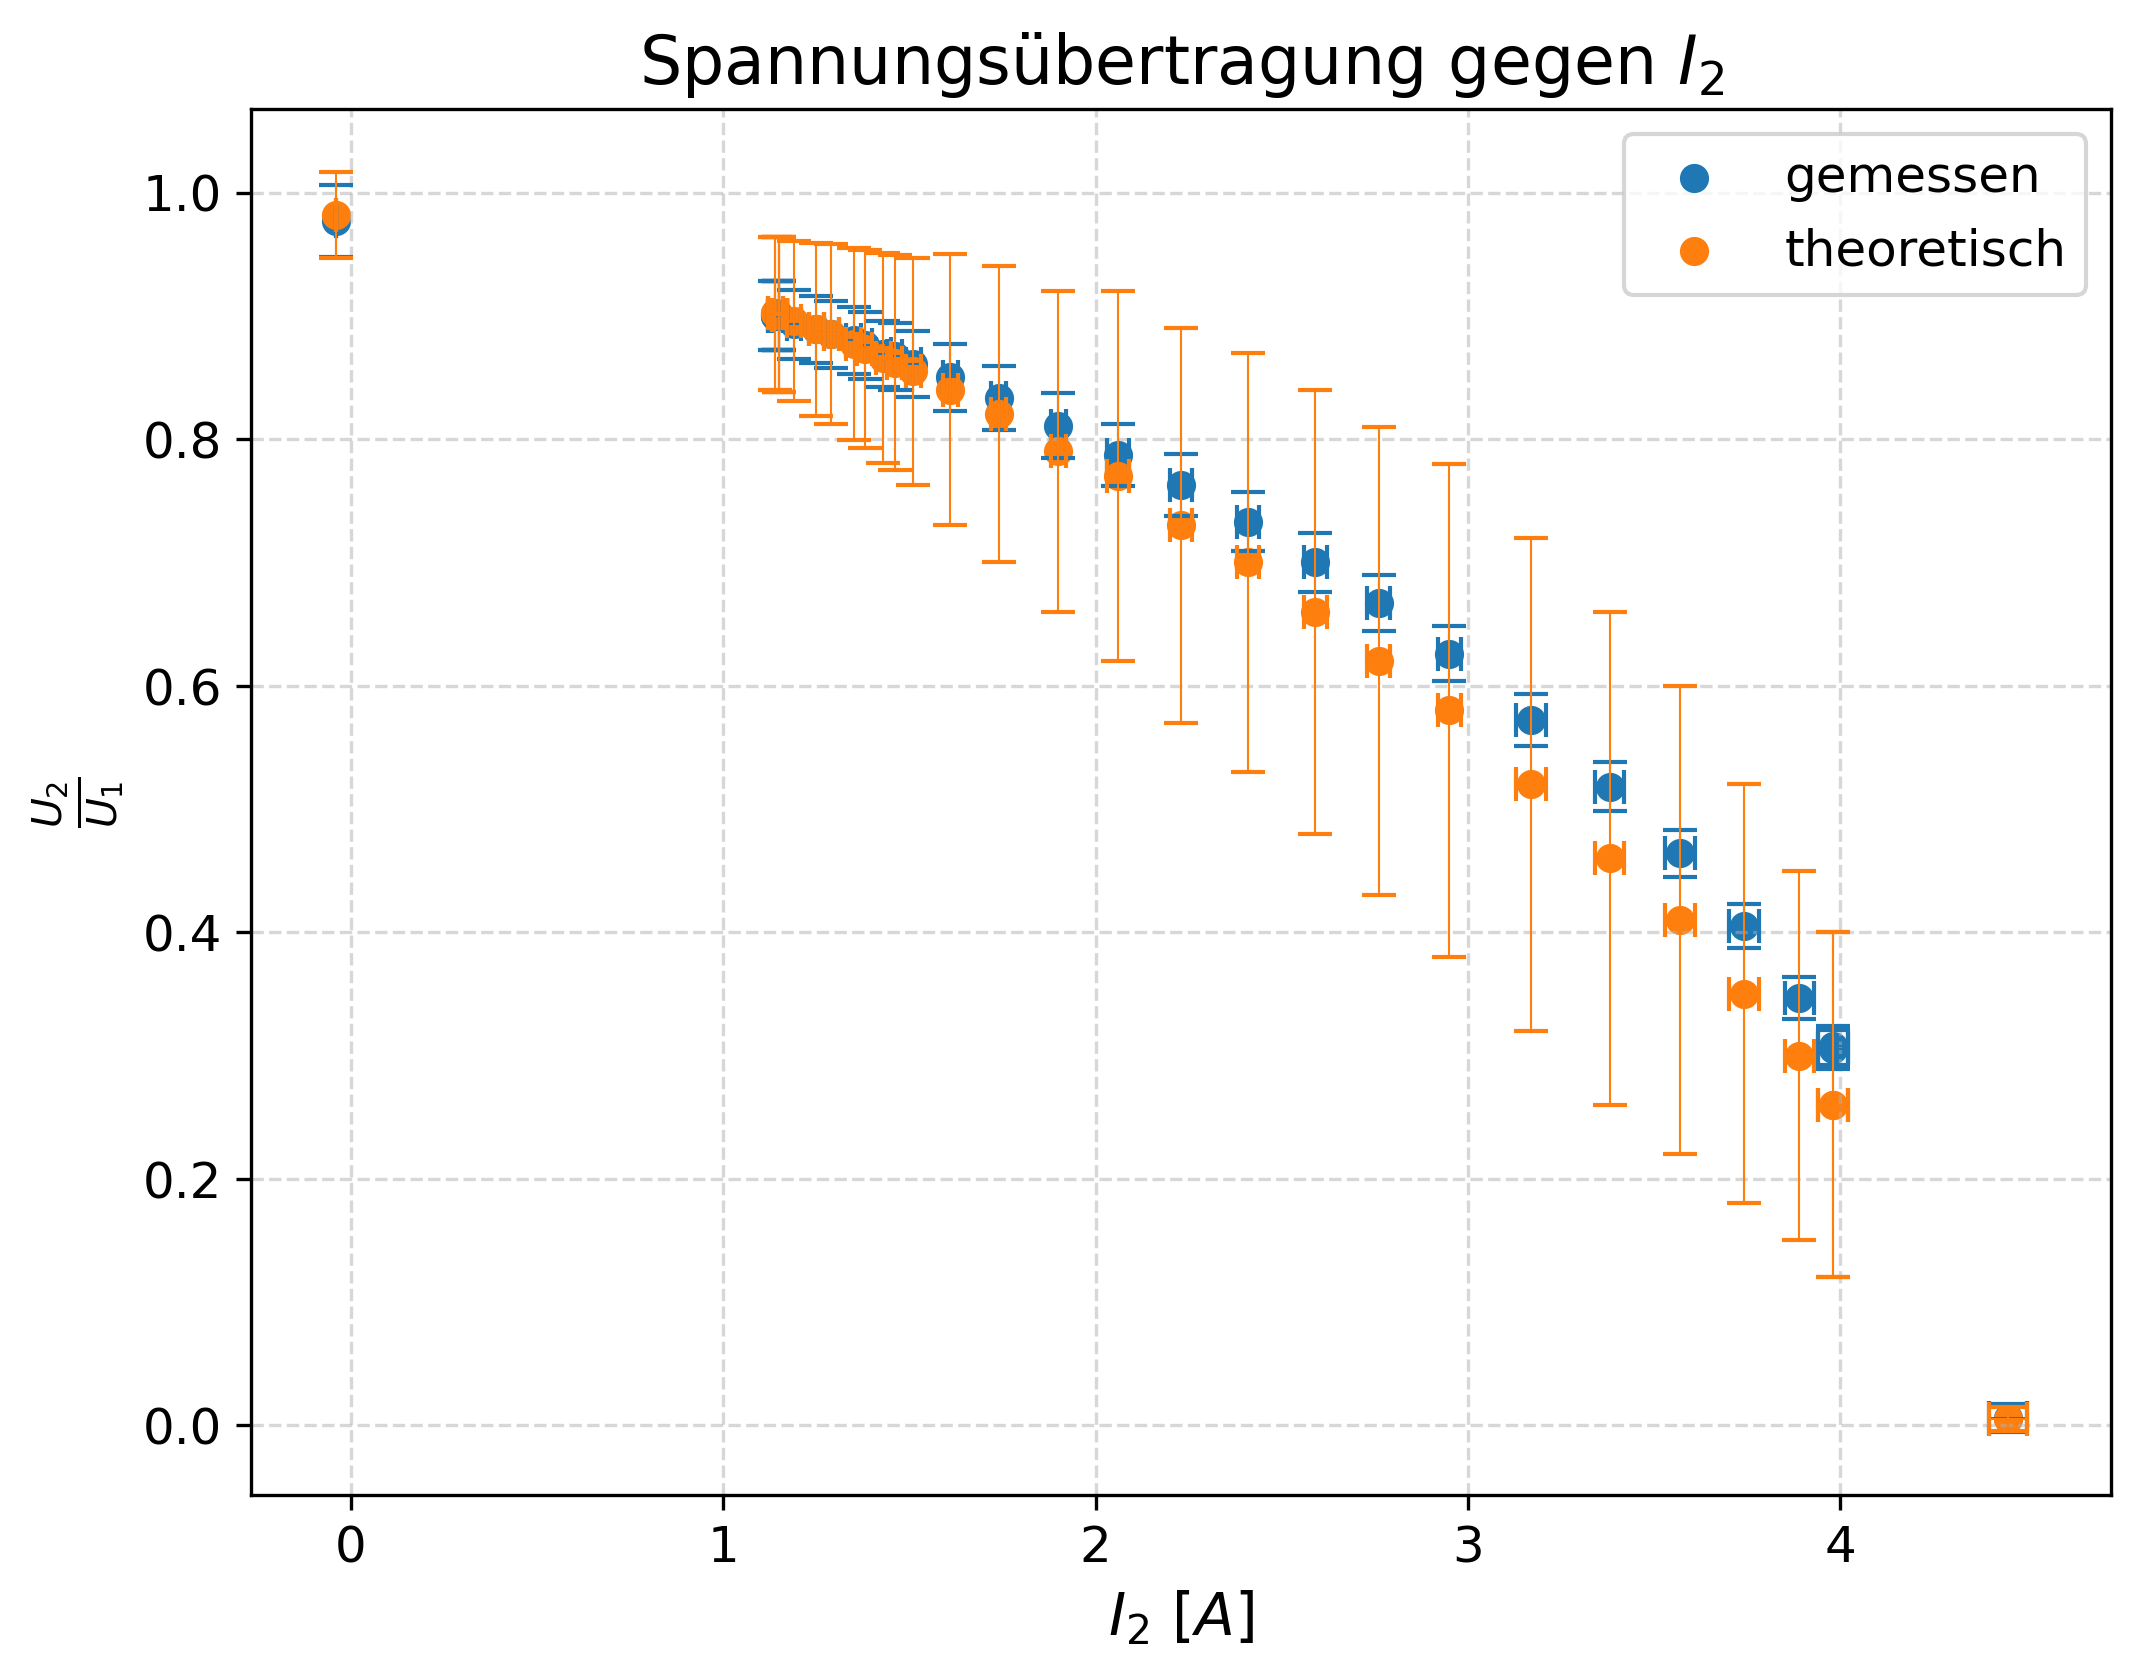

In [265]:
plot = plt.subplots();
fig, ax = plot;

graph.scatter_data(c_data, "I_2 [A]", "U_21", p=plot, label=r"gemessen")
graph.scatter_data(c_data, "I_2 [A]", "calc_U21", p=plot, label=r"theoretisch")

ax.set_title(r"Spannungsübertragung gegen $I_2$")
ax.set_xlabel(r"$I_2~[A]$")
ax.set_ylabel(r"$\frac{U_2}{U_1}$")

ax.legend();

fig.savefig("../output/238f")
fig.savefig("../pdfs/238f.pdf")